In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv 
csv_file_path = '../Resources/Unemployment rate (%).csv'
unemployment_df = pd.read_csv(csv_file_path)
unemployment_df

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15+",2021,5.58,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 25+",2021,4.41,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15+",2021,5.60,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
...,...,...,...,...,...,...,...,...,...,...,...
11391,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15-24",2014,5.93,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11392,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 25+",2014,3.65,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11393,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15+",2014,5.18,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11394,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15-24",2014,7.81,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [3]:
# Drop unnecessary columns 
columns_to_drop = ['indicator.label','source.label', 'obs_status.label','note_classif.label','note_indicator.label','note_source.label' ]
unemployment_df = unemployment_df.drop(columns=columns_to_drop)
unemployment_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2021,5.58
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71
2,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2021,4.41
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45


In [4]:
# Rename columns 
new_column_names = {'ref_area.label': 'country', 'sex.label': 'gender', 'classif1.label':'age_group', 'time':'year','obs_value':'unemployment_rate'}
unemployment_df.rename(columns=new_column_names, inplace=True)
unemployment_df.head()



,country,gender,age_group,year,unemployment_rate
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2021,5.58
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71
2,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2021,4.41
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45


In [5]:
# Drop 'Sex:Total' from gender column, this project only compareing the unemployment rate by gender 
unemployment_df = unemployment_df[unemployment_df['gender'] != 'Sex: Total']
unemployment_df

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Sex: Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Sex: Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",2021,9.41
...,...,...,...,...,...
11391,Zimbabwe,Sex: Male,"Age (Youth, adults): 15-24",2014,5.93
11392,Zimbabwe,Sex: Male,"Age (Youth, adults): 25+",2014,3.65
11393,Zimbabwe,Sex: Female,"Age (Youth, adults): 15+",2014,5.18
11394,Zimbabwe,Sex: Female,"Age (Youth, adults): 15-24",2014,7.81


In [6]:
# Simplify 'gender' column : keep the format as 'male', 'female'
unemployment_df['gender'] = unemployment_df['gender'].str.replace('Sex: ', '')
unemployment_df.head()

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Female,"Age (Youth, adults): 15-24",2021,9.41


In [7]:
# Drop 'Sex:Other' from gender column
unemployment_df = unemployment_df[unemployment_df['gender'] != 'Other']
unemployment_df

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Female,"Age (Youth, adults): 15-24",2021,9.41
...,...,...,...,...,...
11391,Zimbabwe,Male,"Age (Youth, adults): 15-24",2014,5.93
11392,Zimbabwe,Male,"Age (Youth, adults): 25+",2014,3.65
11393,Zimbabwe,Female,"Age (Youth, adults): 15+",2014,5.18
11394,Zimbabwe,Female,"Age (Youth, adults): 15-24",2014,7.81


In [8]:
# Simplify 'age_group' column : extract the number 
unemployment_df['age_group'] = unemployment_df['age_group'].str.extract(r'(\d{2}\+|\d{2}-\d{2})')
unemployment_df.head()

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,15+,2021,5.60
4,Afghanistan,Male,15-24,2021,8.45
5,Afghanistan,Male,25+,2021,4.60
6,Afghanistan,Female,15+,2021,5.50
7,Afghanistan,Female,15-24,2021,9.41


In [9]:
# Remove non-country data 
non_countries = ['World', 'World: Low income', 'World: Lower-middle income', 'World: Upper-middle income', 'World: High income', 'Africa', 'Arab States', 'Asia and the Pacific', 'Europe and Central Asia', 'Americas', 
                 'Netherlands Antilles', 'Hong Kong, China', 'Macau, China', 'Curaçao', 'Cayman Islands', 'Falkland Islands (Malvinas)', 'Cook Islands', 'Niue', 'Taiwan, China', 'Occupied Palestinian Territory']
unemployment_df = unemployment_df[~unemployment_df['country'].isin(non_countries)]



In [10]:
# Get the unique country 
unique_country = unemployment_df['country'].unique()
unique_country
len(unique_country)

184

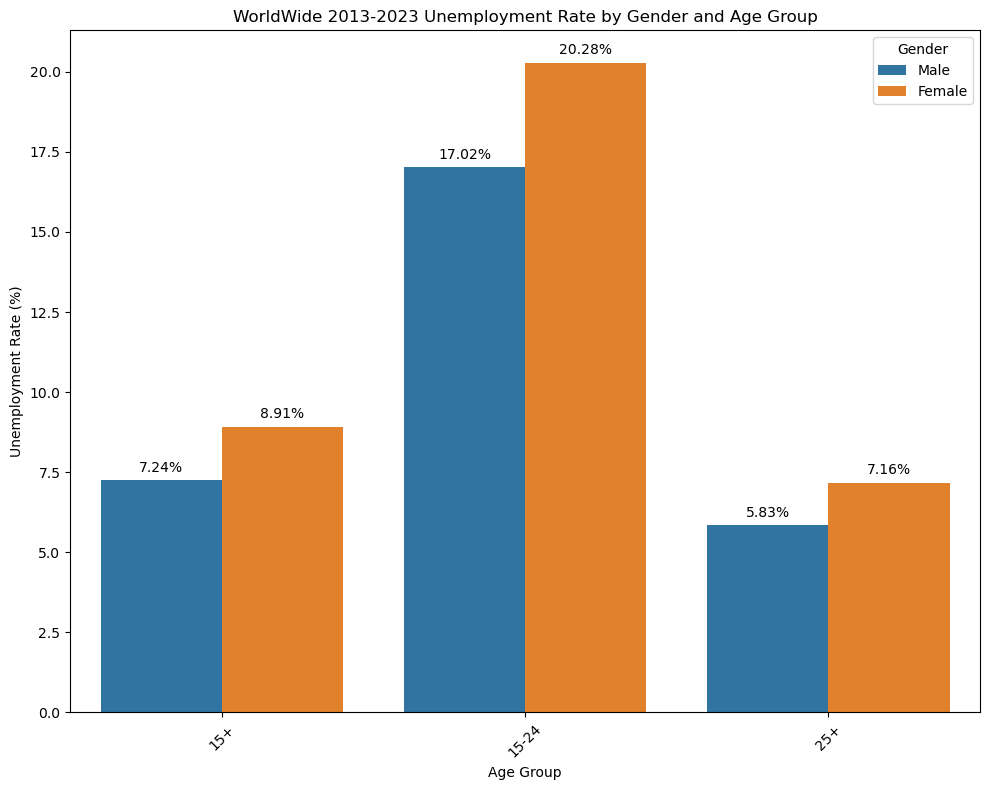

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='age_group', y='unemployment_rate', hue='gender', data=unemployment_df, ci=None)

# Adding the text annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
    
plt.title('WorldWide 2013-2023 Unemployment Rate by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

In [13]:
unemployment_df.to_csv('unemployment_cleaned.csv', index=False)


# Clustering Similar Countries

d:\1\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


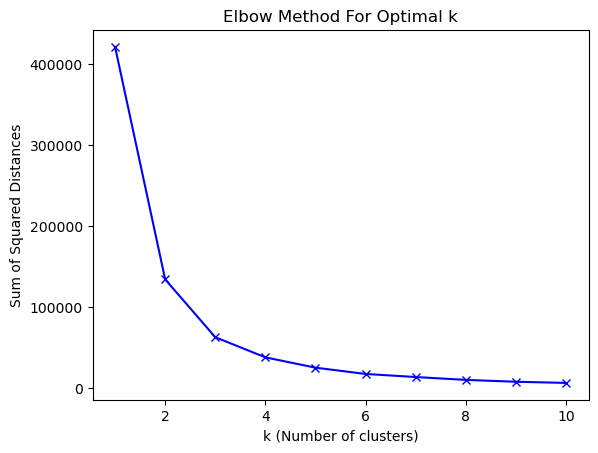

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# filter the DF for only female data 
female_unemployment_df = unemployment_df[unemployment_df['gender'] == 'Female']

# Removing NaN values for safety
female_unemployment_df.dropna(subset=['unemployment_rate'], inplace=True)

# Determining the range of k values to test
k_range = range(1, 11)  # Testing for 1 to 10 clusters

# Calculating sum of squared distances for each k
sum_of_squared_distances = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(female_unemployment_df[['unemployment_rate']])
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [13]:
from sklearn.cluster import KMeans
import seaborn as sns

In [14]:
# Preparing data for clustering

# Handle missing values
cluster_data = female_unemployment_df.groupby(['country'])['unemployment_rate'].mean().reset_index()
cluster_data.dropna(inplace=True)  # Remove rows with NaN values
# Ensure there are no infinite values
cluster_data = cluster_data[np.isfinite(cluster_data['unemployment_rate'])]

In [15]:
# K-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  
cluster_data['cluster'] = kmeans.fit_predict(cluster_data[['unemployment_rate']])

In [16]:
import plotly.express as px

fig = px.scatter(cluster_data, x='country', y='unemployment_rate',
                 color='cluster', hover_name='country',
                 title="Clusters of Countries by Female Unemployment Rate")

fig.update_layout(width=1000, height=600)
fig.update_traces(marker=dict(size=10))
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(showlegend=True)

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.99,
    xanchor="left",
    x=0.99
))

# Show the updated plot
fig.show()




In [17]:
cluster_groups = cluster_data.groupby('cluster')['country'].apply(list)
cluster_groups

cluster
0    [Algeria, Bosnia and Herzegovina, Botswana, Ca...
1    [Australia, Austria, Belarus, Benin, Bolivia, ...
2    [Afghanistan, Azerbaijan, Bangladesh, Belgium,...
3    [Albania, Angola, Argentina, Armenia, Bahamas,...
Name: country, dtype: object

In [18]:
len(cluster_groups[0])

26

In [19]:
len(cluster_groups[1])

74

In [20]:
len(cluster_groups[2])

48

In [21]:
len(cluster_groups[3])

35

In [22]:
print(f"Cluster_0 includes: {cluster_groups[0]}")
print(f"Cluster_1 includes: {cluster_groups[1]}")
print(f"Cluster_2 includes: {cluster_groups[2]}")
print(f"Cluster_3 includes: {cluster_groups[3]}")


Cluster_0 includes: ['Algeria', 'Bosnia and Herzegovina', 'Botswana', 'Cabo Verde', 'Djibouti', 'Egypt', 'Eswatini', 'French Guiana', 'Greece', 'Guadeloupe', 'Iran, Islamic Republic of', 'Iraq', 'Jordan', 'Kosovo', 'Lesotho', 'Namibia', 'North Macedonia', 'Réunion', 'Saint Lucia', 'Saudi Arabia', 'Somalia', 'South Africa', 'Spain', 'Tunisia', 'Tuvalu', 'Yemen']
Cluster_1 includes: ['Australia', 'Austria', 'Belarus', 'Benin', 'Bolivia', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Congo, Democratic Republic of the', 'Cuba', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Ecuador', 'El Salvador', 'Ethiopia', 'Faeroe Islands', 'Gambia', 'Germany', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Iceland', 'Indonesia', 'Isle of Man', 'Israel', 'Japan', 'Kazakhstan', 'Kenya', 'Korea, Republic of', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Liberia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mexico', 'Moldova, Republic of', 'Mozambique', 'Myanmar', 'Netherlands', 'New

In [25]:
female_unemployment_df.head()

,country,gender,age_group,year,unemployment_rate
6,Afghanistan,Female,15+,2021,5.50
7,Afghanistan,Female,15-24,2021,9.41
8,Afghanistan,Female,25+,2021,3.77
15,Afghanistan,Female,15+,2020,16.77
16,Afghanistan,Female,15-24,2020,21.11


# Classification of Unemployment Levels Using Random Forest

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Transform the unemployment_rate into categories
bins = [0, 15, 30, 100]  # Example bins - you may need to adjust these
labels = ['Low', 'Medium', 'High']
female_unemployment_df['unemployment_level'] = pd.cut(female_unemployment_df['unemployment_rate'], bins=bins, labels=labels)

# Encode categorical variables
label_encoder = LabelEncoder()
female_unemployment_df['country'] = label_encoder.fit_transform(female_unemployment_df['country'])
female_unemployment_df['age_group'] = label_encoder.fit_transform(female_unemployment_df['age_group'])

# Split the data into features and target
X = female_unemployment_df[['country', 'age_group', 'year']]  # features
y = female_unemployment_df['unemployment_level']  # target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Accuracy: 0.6717095310136157


# Model Optimisation

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Handle imbalanced data

# Transform the unemployment_rate into categories
bins = [0, 15, 30, 100]
labels = ['Low', 'Medium', 'High']
female_unemployment_df.loc[:,'unemployment_level'] = pd.cut(female_unemployment_df.loc[:, 'unemployment_rate'], bins=bins, labels=labels)

# Encode categorical variables
label_encoder = LabelEncoder()
female_unemployment_df.loc[:,'country'] = label_encoder.fit_transform(female_unemployment_df['country'])
female_unemployment_df.loc[:,'age_group'] = label_encoder.fit_transform(female_unemployment_df['age_group'])

# Split the data into features and target
X = female_unemployment_df.loc[:,['country', 'age_group', 'year']]
y = female_unemployment_df.loc[:, 'unemployment_level']

# Handle imbalanced data
smote = SMOTE()
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict on the test set with the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-Validation
cross_val_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())


d:\1\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.95      0.91       484
         Low       0.91      0.73      0.81       491
      Medium       0.79      0.87      0.83       467

    accuracy                           0.85      1442
   macro avg       0.85      0.85      0.85      1442
weighted avg       0.85      0.85      0.85      1442

Confusion Matrix:
 [[461   5  18]
 [ 43 358  90]
 [ 30  32 405]]
Cross-Validation Scores: [0.66504854 0.7369882  0.759195   0.68424705 0.75294934]
Mean CV Score: 0.719685628238211
